In [162]:
import numpy as np
import pandas as pd

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
train = pd.read_csv("train.csv")

In [165]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

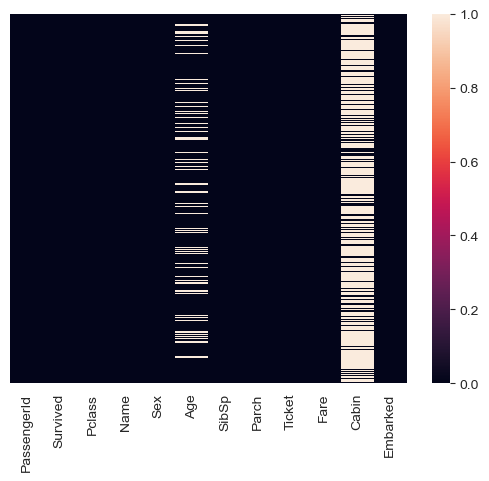

In [166]:
# check missing data in dataset
sns.heatmap(train.isnull(), yticklabels=False)

In [167]:
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

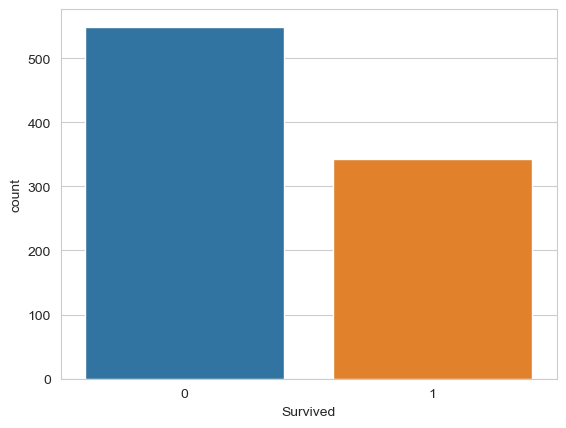

In [168]:
sns.countplot(data=train, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

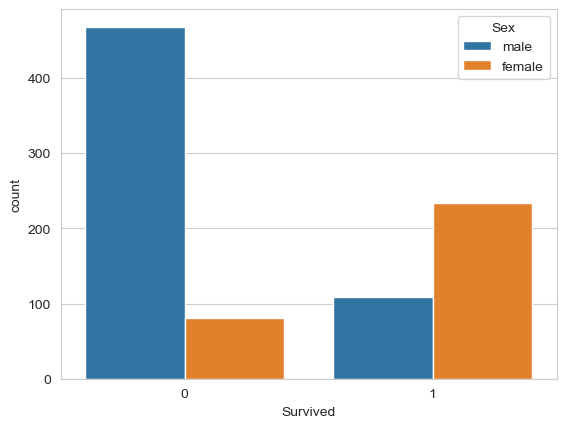

In [169]:
sns.countplot(data=train, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

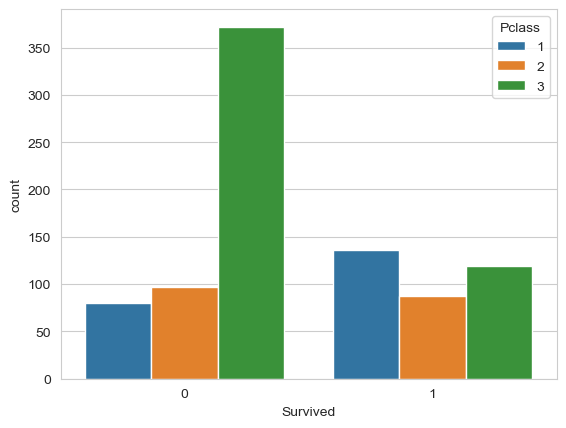

In [170]:
sns.countplot(data=train, x='Survived', hue='Pclass')

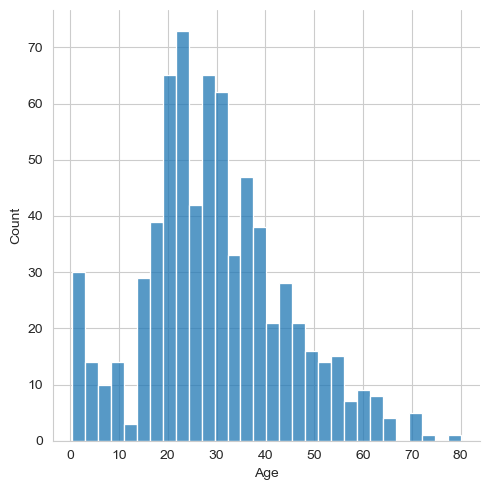

In [171]:
sns.displot(data=train, x='Age', bins=30)

<Axes: ylabel='Frequency'>

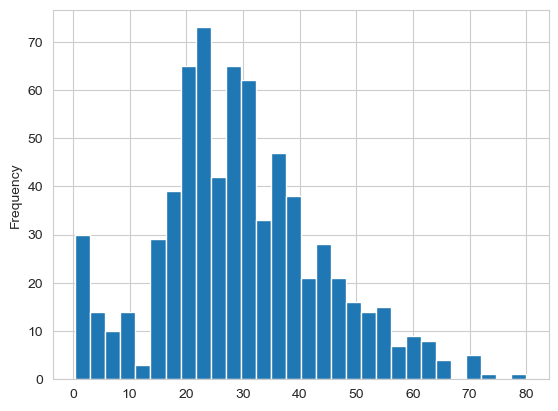

In [172]:
train.Age.plot.hist(bins=30)

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

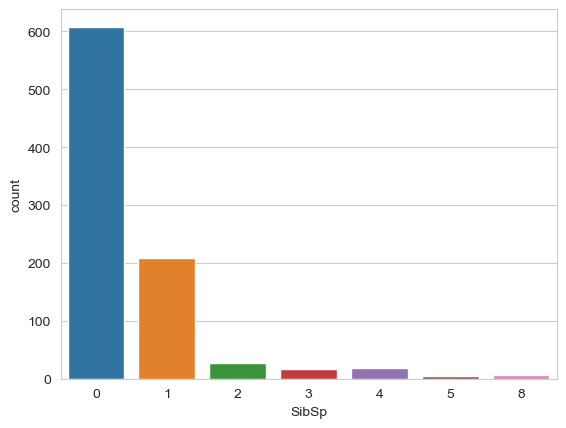

In [174]:
sns.countplot(data=train, x='SibSp')

<Axes: >

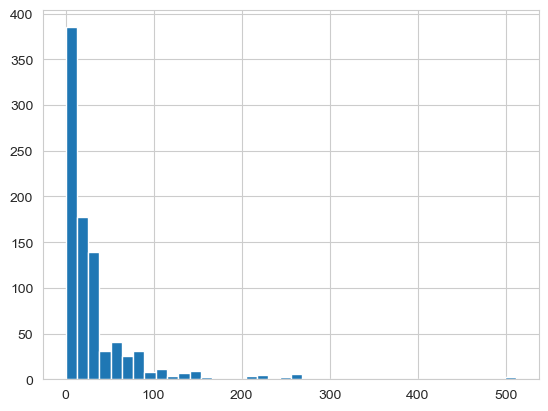

In [175]:
train.Fare.hist(bins=40)

In [176]:
import cufflinks as cf
cf.go_offline()

In [177]:
train['Fare'].iplot(kind='hist', bins=40)

<Axes: xlabel='Pclass', ylabel='Age'>

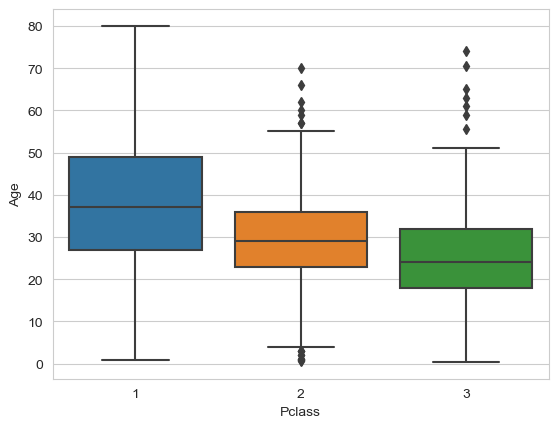

In [178]:
# Data Cleaning

sns.boxplot(x='Pclass', y='Age', data=train)

In [179]:
# alot of values in age are empty. so we will fill them
# with avergae age by every passenger class(Pclass)

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return round(train.loc[train['Pclass'] == 1]['Age'].mean())
        elif Pclass == 2:
            return round(train.loc[train['Pclass'] == 2]['Age'].mean())
        else:
            return round(train.loc[train['Pclass'] == 3]['Age'].mean())
    else:
        return Age

In [180]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

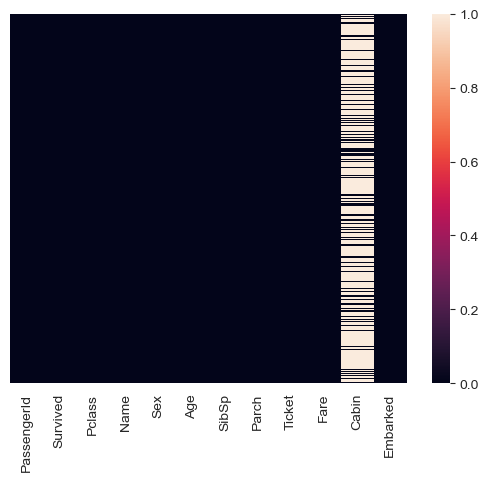

In [181]:
sns.heatmap(train.isnull(), yticklabels=False)

In [182]:
# drop cabin class as too much missin values
train.drop('Cabin', axis=1, inplace=True)

In [183]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [184]:
train.dropna(inplace=True)

<Axes: >

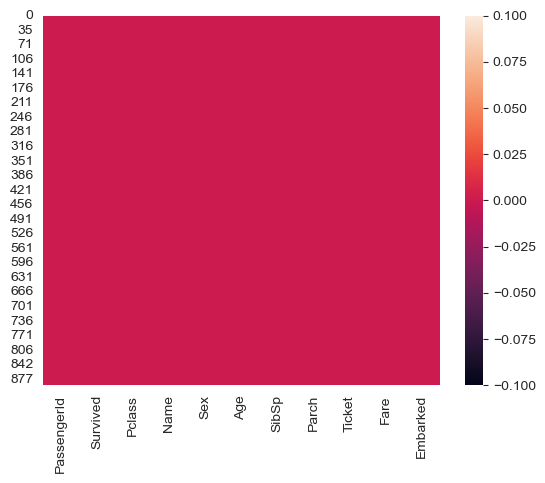

In [185]:
# data cleaned
sns.heatmap(train.isnull())

In [186]:
# convert categorical data into indicator/dummy variables/data
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [187]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [188]:
# concate these new df columns
train = pd.concat([train, sex, embark], axis=1)

In [189]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [190]:
# drop unnecessary cols
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [191]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [192]:
train.drop('PassengerId', axis=1, inplace=True)

In [193]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [194]:
# features
X = train.drop('Survived', axis=1)
# what we want to predict
y = train['Survived']

In [196]:
# split data into train and testing
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [209]:
# create and train model
from sklearn.linear_model import LogisticRegression

In [210]:
model = LogisticRegression()

In [211]:
model.fit(X_train, y_train)

D:\apps\anaconda\files\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [212]:
predictions = model.predict(X_test)

In [216]:
# model report/result/accuracy
from sklearn.metrics import classification_report

In [219]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [218]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [223]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

In [246]:
# TESTING MODEL

data = {
    'Pclass': 3,
    'Age': 27,
    'SibSp': 1,
    'Parch': 2,
    'Fare': 70,
    'male': 1,
    'Q': 0,
    'S': 1
}

test_df = pd.DataFrame([data])
test_df

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,27,1,2,70,1,0,1


In [247]:
predicted_survival = model.predict(test_df)

In [248]:
# 0=died, 1=survived
predicted_survival

array([0], dtype=int64)